# <font color=#BB44>**Clustering example: OSA case study**</font>
### PRDL & MLLB courses ETSIT - UPM

* ## Following:
> * ## [Comparison Of K-Means & Hierarchical Clustering In Customer Segmentation](https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/)



---

# IMPORT OSA data into Pandas Data Frame




In [17]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_extreme_male.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
#df.set_index('Patient', inplace=True)
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,1,80,173,32,40,Healthy,26.729927
1,P0006,1,109,190,32,42,Healthy,30.193906
2,P0007,1,86,169,39,42,Severe,30.110991
3,P0008,1,145,172,47,44,Severe,49.012980
4,P0013,1,90,180,36,40,Healthy,27.777778


---
---
# **IMPORTANT**: 

* in this example we are look for clusters using Weight, Height, Age, Cervical and BMI

* once clusters are obtained we will try:


> 1.- Understand the clusters, for example ¿are some clusters representing old persons with high BMI? ¿young and not obese? etc...


> 2.- explore whether or not some clusters mainly contain severe or healthy











In [18]:
features_of_interest = ["IAH", "Weight", "Height", "Age", "Cervical", "BMI"]

In [19]:
X = data[features_of_interest]

In [20]:
X.head(5)

,IAH,Weight,Height,Age,Cervical,BMI
0,9.0,80,173,32,40,26.729927
1,2.0,109,190,32,42,30.193906
2,34.0,86,169,39,42,30.110991
3,60.0,145,172,47,44,49.012980
4,3.7,90,180,36,40,27.777778


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [22]:
X_normalized[0:5,]

array([[-0.70103104, -0.66742114, -0.35648909, -1.27536675, -0.64548558,
        -0.58262744],
       [-1.00931388,  0.89248402,  1.94310969, -1.27536675, -0.05343424,
         0.05271263],
       [ 0.3999791 , -0.34468214, -0.89757115, -0.70213167, -0.05343424,
         0.03750486],
       [ 1.54502965,  2.82891802, -0.4917596 , -0.04700587,  0.5386171 ,
         3.50438318],
       [-0.93444519, -0.12952281,  0.59040453, -0.94780385, -0.64548558,
        -0.39043765]])

# **Let's start using k-means**
* In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. 

* To find the optimal number of clusters for K-Means, the Elbow method is used based on Within-Cluster-Sum-of-Squares (WCSS).

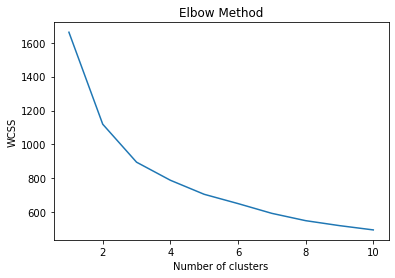

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* As we can see in the above figure, the above plot is visualized as a hand and we need to identify the location of the elbow on the X-axis. In the above plot, the elbow seems to be on point 5 of X-axis. So, the optimal number of clusters will be 5 for the K-Means algorithm*

---
 * After finding the optimal number of clusters, fit the K-Means clustering model to the dataset defined in the second step and then predict clusters for each of the data elements. It means it will predict which of the 5 clusters the data item will belong to.*

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_normalized)

# **EXPLORE THE CLUSTER CENTERS**

In [36]:
kmeans.cluster_centers_

array([[-0.02521726, -0.68170907, -0.7221422 ,  1.06235755, -0.3263329 ,
        -0.43925757],
       [ 0.58123289,  0.35290476, -0.33746667,  0.47248842,  0.78376336,
         0.58072695],
       [-0.5450196 ,  0.07570609,  1.04616212, -0.72984853, -0.18550723,
        -0.36439565],
       [-0.7408368 , -0.8991312 , -0.43713113, -0.68008417, -1.13506649,
        -0.80878098],
       [ 1.19889958,  1.96491882,  0.70453903, -0.48205035,  1.30643368,
         1.771509  ]])

* # We have to "unscale" the feature values... to better understand it!

In [37]:
Centers = scaler.inverse_transform(kmeans.cluster_centers_)

df_centers = pd.DataFrame(data = Centers,
                  columns = features_of_interest) 

df_centers

,IAH,Weight,Height,Age,Cervical,BMI
0,24.345312,79.734375,170.296875,60.546875,41.078125,27.511604
1,38.115625,98.968750,173.140625,53.343750,44.828125,33.072727
2,12.542462,93.815385,183.369231,38.661538,41.553846,27.919763
3,8.096154,75.692308,172.403846,39.269231,38.346154,25.496901
4,52.140625,128.937500,180.843750,41.687500,46.593750,39.565066


## visualization

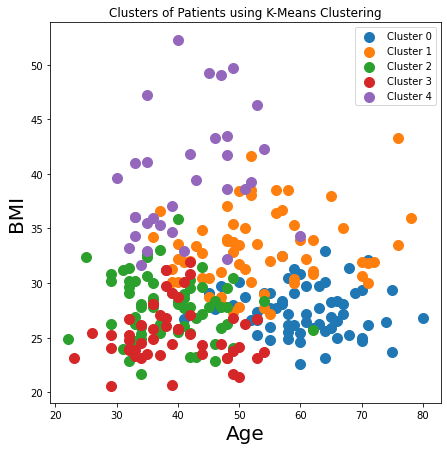

In [33]:
plt.figure(figsize=(7,7))
plt.scatter(X.iloc[y_kmeans == 0, 3], X.iloc[y_kmeans == 0, 5], s = 100,  label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 3], X.iloc[y_kmeans == 1, 5], s = 100,  label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 3], X.iloc[y_kmeans == 2, 5], s = 100,  label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 3], X.iloc[y_kmeans == 3, 5], s = 100, label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 3], X.iloc[y_kmeans == 4, 5], s = 100, label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Age', fontsize=20)
plt.ylabel('BMI', fontsize=20)
plt.legend()
plt.show()


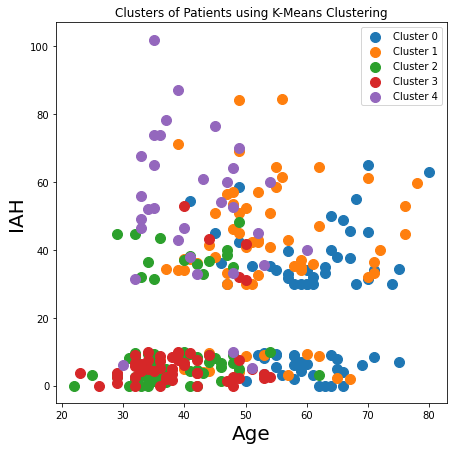

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(X.iloc[y_kmeans == 0, 3], X.iloc[y_kmeans == 0, 0], s = 100,  label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 3], X.iloc[y_kmeans == 1, 0], s = 100,  label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 3], X.iloc[y_kmeans == 2, 0], s = 100, label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 3], X.iloc[y_kmeans == 3, 0], s = 100, label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 3], X.iloc[y_kmeans == 4, 0], s = 100,  label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Age', fontsize=20)
plt.ylabel('IAH', fontsize=20)
plt.legend()


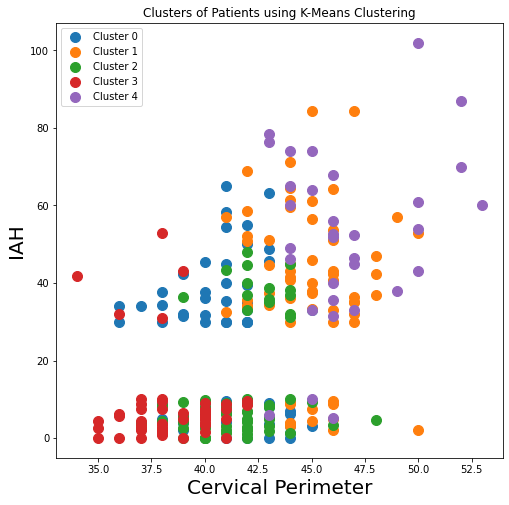

In [35]:

plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 4], X.iloc[y_kmeans == 0, 0], s = 100,  label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 4], X.iloc[y_kmeans == 1, 0], s = 100,  label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 4], X.iloc[y_kmeans == 2, 0], s = 100,  label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 4], X.iloc[y_kmeans == 3, 0], s = 100,  label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 4], X.iloc[y_kmeans == 4, 0], s = 100,  label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Cervical Perimeter', fontsize=20)
plt.ylabel('IAH', fontsize=20)
plt.legend()
plt.show()

* ## [Cophenet](http://www.ece.northwestern.edu/local-apps/matlabhelp/toolbox/stats/cophenet.html) correlation

In [ ]:
# DISTANCE MATRIX
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

distance_matrix = linkage(X_normalized, "ward")
c, coph_distance = cophenet(distance_matrix, pdist(X_normalized))
print ("Cophenet Distance = " + str(c))

---
# **Now let's try hierarchical clustering**

* import data again so not necessary to run the code above every time

In [1]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_extreme_male.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
#df.set_index('Patient', inplace=True)
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,1,80,173,32,40,Healthy,26.729927
1,P0006,1,109,190,32,42,Healthy,30.193906
2,P0007,1,86,169,39,42,Severe,30.110991
3,P0008,1,145,172,47,44,Severe,49.012980
4,P0013,1,90,180,36,40,Healthy,27.777778


In [2]:
features_of_interest = ["IAH", "Weight", "Height", "Age", "Cervical", "BMI"]
X = data[features_of_interest]
X.head(5)

,IAH,Weight,Height,Age,Cervical,BMI
0,9.0,80,173,32,40,26.729927
1,2.0,109,190,32,42,30.193906
2,34.0,86,169,39,42,30.110991
3,60.0,145,172,47,44,49.012980
4,3.7,90,180,36,40,27.777778


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

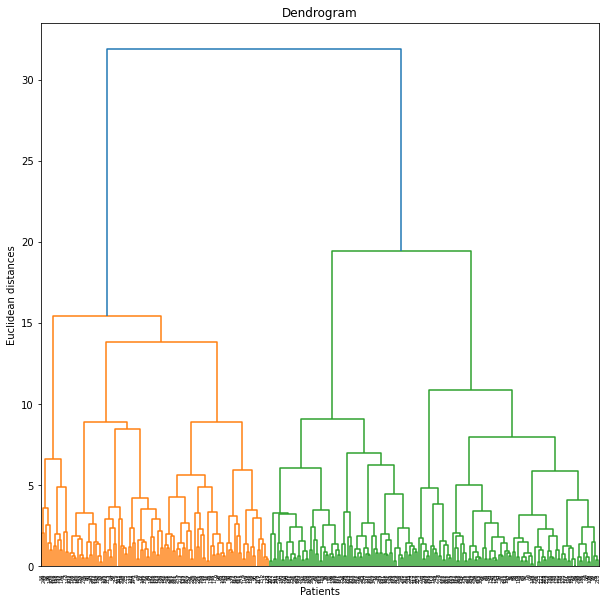

In [9]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_normalized, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()

# ... again an optimal number of clusters will be 5 for hierarchical clustering. 


---

* # Now we train the hierarchical clustering algorithm and predict the cluster for each data point


In [5]:

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_normalized)


* # Once the algorithm predicts the cluster for each of the data points, it can be visualized now.

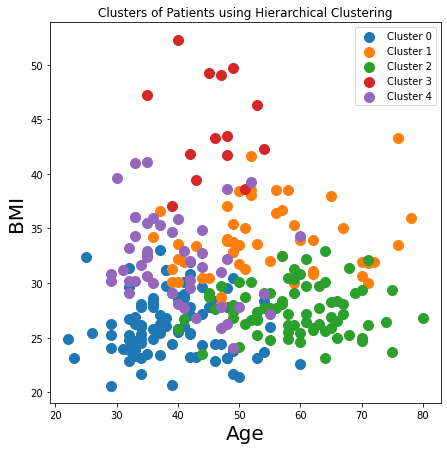

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(X.iloc[y_hc == 0, 3], X.iloc[y_hc == 0, 5], s = 100,  label = 'Cluster 0')
plt.scatter(X.iloc[y_hc == 1, 3], X.iloc[y_hc == 1, 5], s = 100,  label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 2, 3], X.iloc[y_hc == 2, 5], s = 100,  label = 'Cluster 2')
plt.scatter(X.iloc[y_hc == 3, 3], X.iloc[y_hc == 3, 5], s = 100,  label = 'Cluster 3')
plt.scatter(X.iloc[y_hc == 4, 3], X.iloc[y_hc == 4, 5], s = 100,  label = 'Cluster 4')
plt.title('Clusters of Patients using Hierarchical Clustering')
plt.xlabel('Age', fontsize=20)
plt.ylabel('BMI', fontsize=20)
plt.legend()
plt.show()

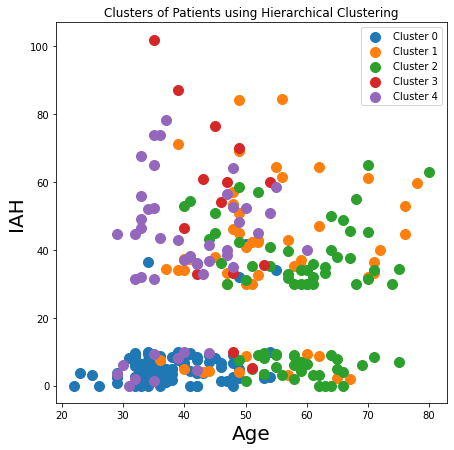

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(X.iloc[y_hc == 0, 3], X.iloc[y_hc == 0, 0], s = 100,  label = 'Cluster 0')
plt.scatter(X.iloc[y_hc == 1, 3], X.iloc[y_hc == 1, 0], s = 100,  label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 2, 3], X.iloc[y_hc == 2, 0], s = 100,  label = 'Cluster 2')
plt.scatter(X.iloc[y_hc == 3, 3], X.iloc[y_hc == 3, 0], s = 100,  label = 'Cluster 3')
plt.scatter(X.iloc[y_hc == 4, 3], X.iloc[y_hc == 4, 0], s = 100,  label = 'Cluster 4')
plt.title('Clusters of Patients using Hierarchical Clustering')
plt.xlabel('Age', fontsize=20)
plt.ylabel('IAH', fontsize=20)
plt.legend()
plt.show()